In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook

# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
# Preprocessing

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
# Set the dimensions of the noise
z_dim = 100

In [0]:
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

g = Sequential()
g.add(Dense(256, input_dim=z_dim, activation=LeakyReLU(alpha=0.2)))
g.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
g.add(Dense(1024, activation=LeakyReLU(alpha=0.2)))
g.add(Dense(784, activation='sigmoid'))  # Values between 0 and 1
g.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

d = Sequential()
d.add(Dense(1024, input_dim=784, activation=LeakyReLU(alpha=0.2)))
d.add(Dropout(0.3))
d.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
d.add(Dropout(0.3))
d.add(Dense(256, activation=LeakyReLU(alpha=0.2)))
d.add(Dropout(0.3))
d.add(Dense(1, activation='sigmoid'))  # Values between 0 and 1
d.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

d.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = g(inputs)
output = d(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [0]:
# Set up a vector (dict) to store the losses
losses = {"D":[], "G":[]}

def train(epochs=1, plt_frq=1, BATCH_SIZE=128):
    batchCount = int(X_train.shape[0] / BATCH_SIZE)
    print('Epochs:', epochs)
    print('Batch size:', BATCH_SIZE)
    print('Batches per epoch:', batchCount)
    
    for e in tqdm_notebook(range(1, epochs+1)):
        if e == 1 or e%plt_frq == 0:
            print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):  # tqdm_notebook(range(batchCount), leave=False):
            # Create a batch by drawing random index numbers from the training set
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)]
            # Create noise vectors for the generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            
            # Generate the images from the noise
            generated_images = g.predict(noise)
            X = np.concatenate((image_batch, generated_images))
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 0.9  # One-sided label smoothing

            # Train discriminator on generated images
            d.trainable = True
            d_loss = d.train_on_batch(X, y)

            # Train generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            y2 = np.ones(BATCH_SIZE)
            d.trainable = False
            g_loss = gan.train_on_batch(noise, y2)

        # Only store losses from final batch of epoch
        # losses["D"].append(d_loss)
        # losses["G"].append(g_loss)


In [0]:
train(epochs=10, plt_frq=20, BATCH_SIZE=128)

Epochs: 10
Batch size: 128
Batches per epoch: 468


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


--------------- Epoch 1 ---------------


FailedPreconditionError: ignored

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


###################### epoch 0 completed #########################


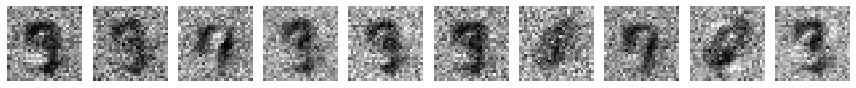

###################### epoch 1 completed #########################


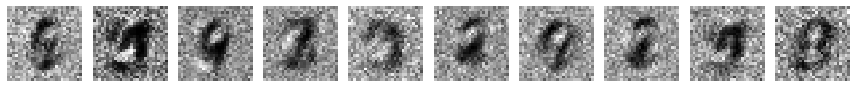

###################### epoch 2 completed #########################


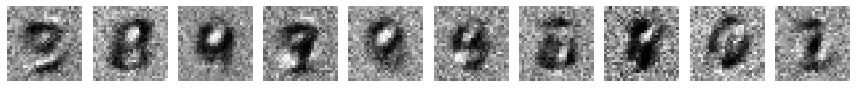

###################### epoch 3 completed #########################


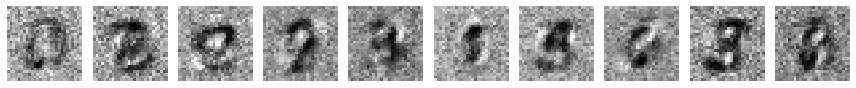

###################### epoch 4 completed #########################


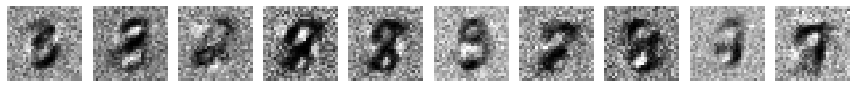

###################### epoch 5 completed #########################


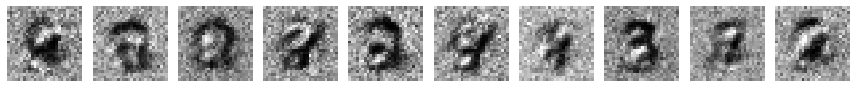

###################### epoch 6 completed #########################


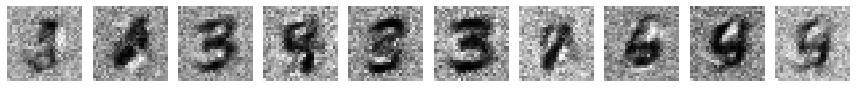

###################### epoch 7 completed #########################


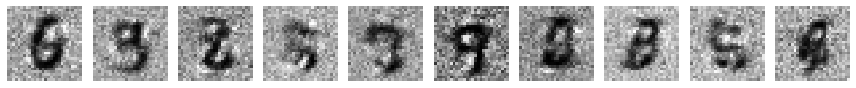

###################### epoch 8 completed #########################


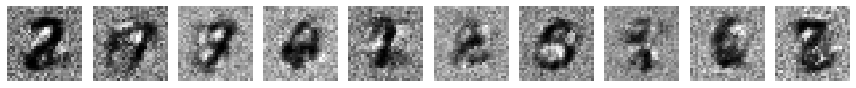

###################### epoch 9 completed #########################


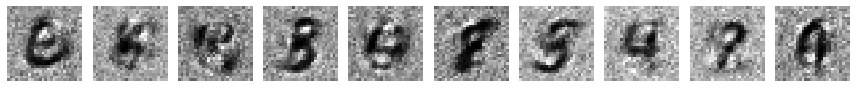

###################### epoch 10 completed #########################


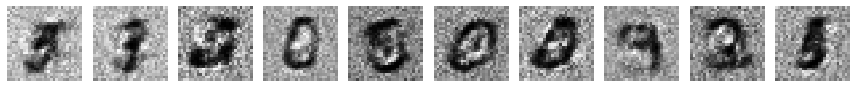

###################### epoch 11 completed #########################


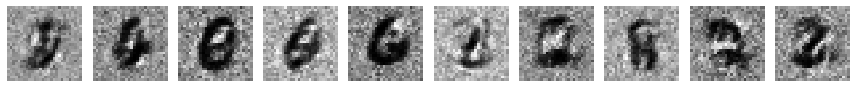

###################### epoch 12 completed #########################


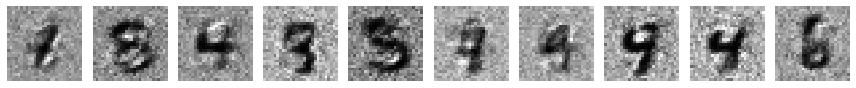

###################### epoch 13 completed #########################


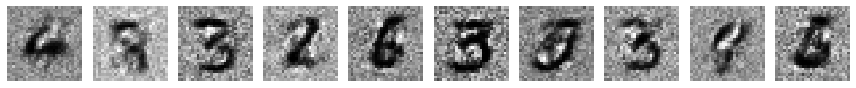

###################### epoch 14 completed #########################


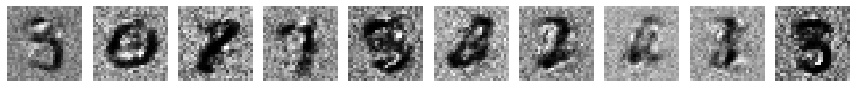

###################### epoch 15 completed #########################


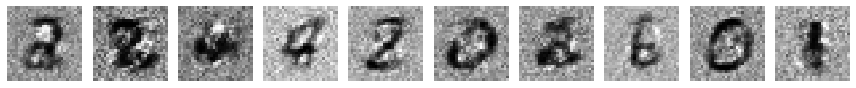

###################### epoch 16 completed #########################


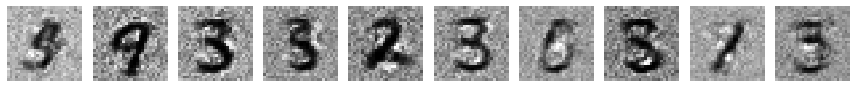

###################### epoch 17 completed #########################


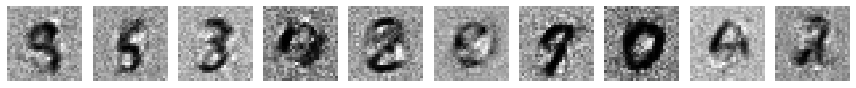

###################### epoch 18 completed #########################


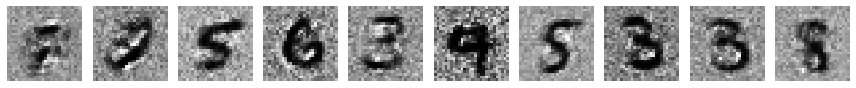

###################### epoch 19 completed #########################


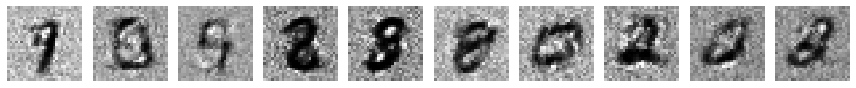

###################### epoch 20 completed #########################


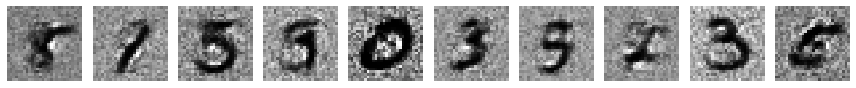

###################### epoch 21 completed #########################


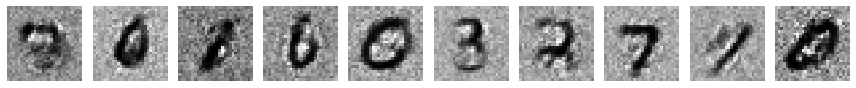

###################### epoch 22 completed #########################


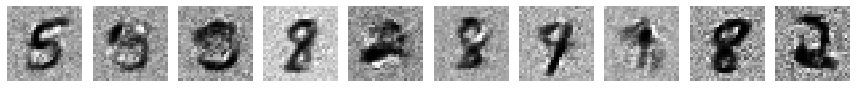

###################### epoch 23 completed #########################


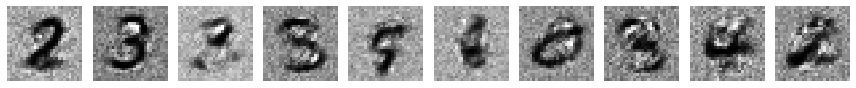

###################### epoch 24 completed #########################


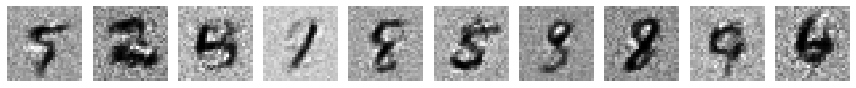

###################### epoch 25 completed #########################


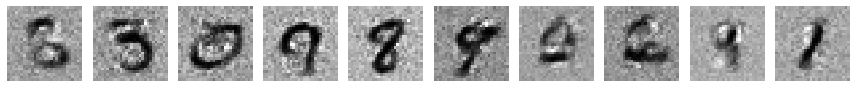

###################### epoch 26 completed #########################


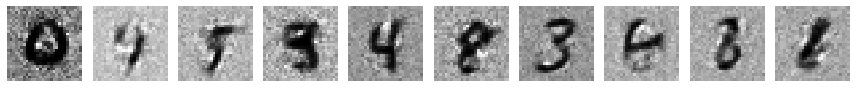

###################### epoch 27 completed #########################


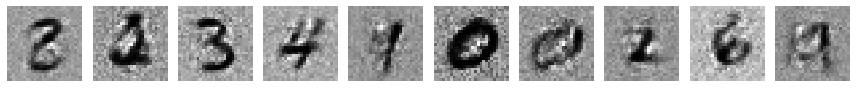

###################### epoch 28 completed #########################


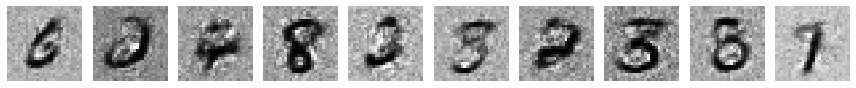

###################### epoch 29 completed #########################


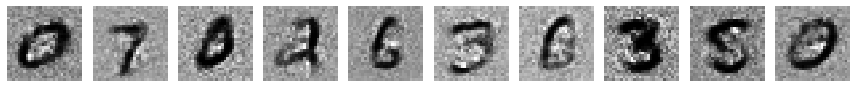

###################### epoch 30 completed #########################


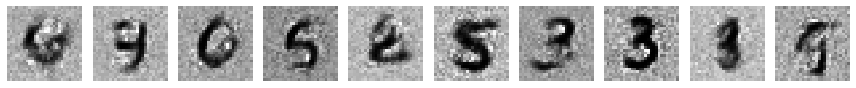

###################### epoch 31 completed #########################


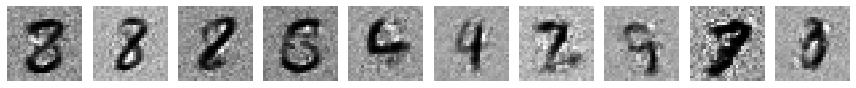

###################### epoch 32 completed #########################


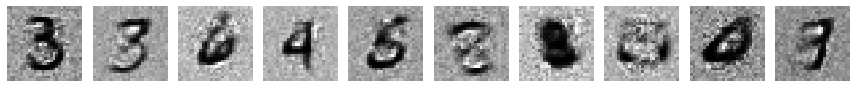

###################### epoch 33 completed #########################


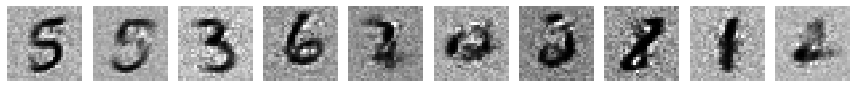

###################### epoch 34 completed #########################


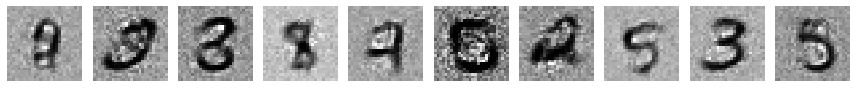

###################### epoch 35 completed #########################


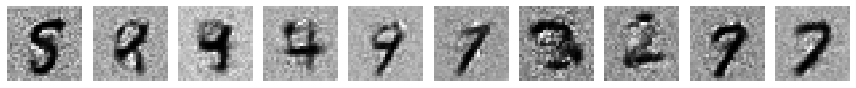

###################### epoch 36 completed #########################


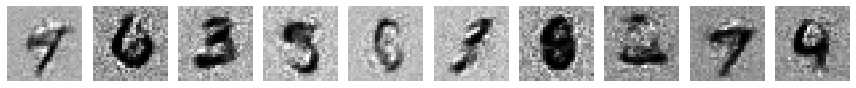

###################### epoch 37 completed #########################


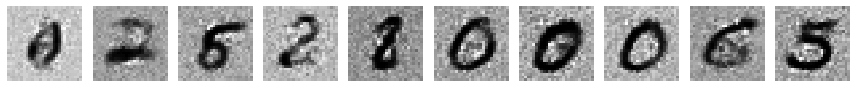

###################### epoch 38 completed #########################


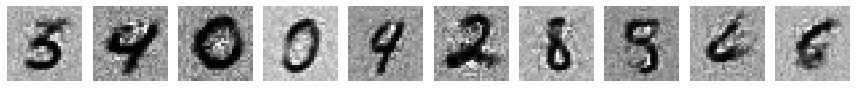

###################### epoch 39 completed #########################


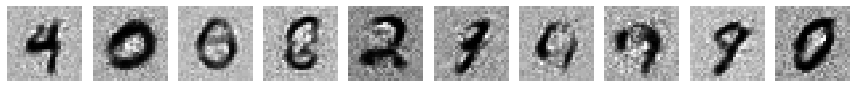

###################### epoch 40 completed #########################


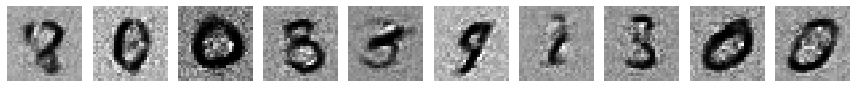

###################### epoch 41 completed #########################


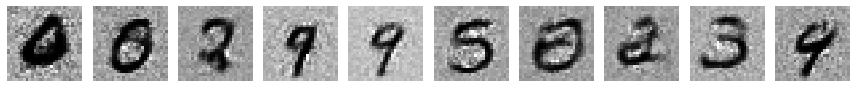

###################### epoch 42 completed #########################


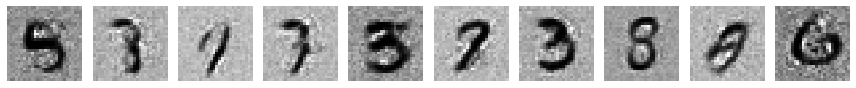

###################### epoch 43 completed #########################


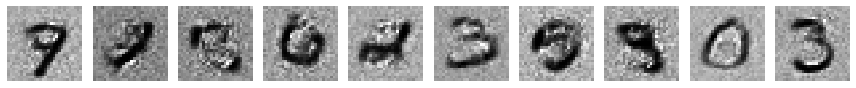

###################### epoch 44 completed #########################


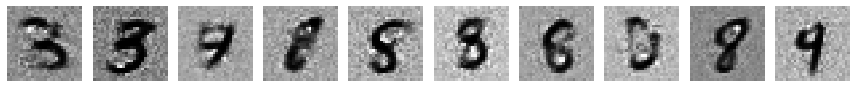

###################### epoch 45 completed #########################


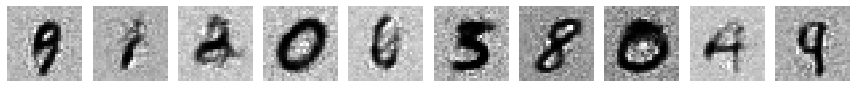

In [0]:
  # example of training a gan on mnist
  from numpy import expand_dims
  from numpy import zeros
  from numpy import ones
  from numpy import vstack
  from numpy.random import randn
  from numpy.random import randint
  from keras.datasets.mnist import load_data
  from keras.optimizers import Adam
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import Reshape
  from keras.layers import Flatten
  from keras.layers import Conv2D
  from keras.layers import Conv2DTranspose
  from keras.layers import LeakyReLU
  from keras.layers import Dropout
  from matplotlib import pyplot

  # define the standalone discriminator model
  def define_discriminator():
    d = Sequential()
    d.add(Dense(1024, input_dim=784, activation=LeakyReLU(alpha=0.2)))
    d.add(Dropout(0.3))
    d.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
    d.add(Dropout(0.3))
    d.add(Dense(256, activation=LeakyReLU(alpha=0.2)))
    d.add(Dropout(0.3))
    d.add(Dense(1, activation='sigmoid'))  # Values between 0 and 1
    d.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return d
    

  # define the standalone generator model
  def define_generator(z_dim):
    g = Sequential()
    g.add(Dense(256, input_dim=z_dim, activation=LeakyReLU(alpha=0.2)))
    g.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
    g.add(Dense(1024, activation=LeakyReLU(alpha=0.2)))
    g.add(Dense(784, activation='tanh'))  # Values between -1 and 1
    g.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return g
    

  # define the combined generator and discriminator model, for updating the generator
  def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

  # load and prepare mnist training images
  def load_real_samples():
    # load mnist dataset
    (trainX, _), (_, _) = load_data()
    # expand to 3d, e.g. add channels dimension
    X = trainX.reshape(60000, 784)
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [0,1]
    X = X / 255.0
    return X

  # select real samples
  def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    return X, y

  # generate points in latent space as input for the generator
  def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

  # use the generator to generate n fake examples, with class labels
  def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y


  def plot_loss(losses):
      """
      @losses.keys():
          0: loss
          1: accuracy
      """
      d_loss = [v for v in losses["D"]]
      g_loss = [v for v in losses["G"]]
      
      plt.figure(figsize=(10,8))
      plt.plot(d_loss, label="Discriminator loss")
      plt.plot(g_loss, label="Generator loss")

      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()
      
  def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
      noise = np.random.normal(0, 1, size=(n_ex, z_dim))
      generated_images = g_model.predict(noise)
      generated_images = generated_images.reshape(generated_images.shape[0], 28, 28)
      plt.figure(figsize=figsize)
      for i in range(generated_images.shape[0]):
          plt.subplot(dim[0], dim[1], i+1)
          plt.imshow(generated_images[i, :, :], interpolation='nearest', cmap='gray_r')
          plt.axis('off')
      plt.tight_layout()
      plt.show()

  # train the generator and discriminator
  def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    losses = {"D":[], "G":[]}
    samples = []
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
      # enumerate batches over the training set
      for j in range(bat_per_epo):
        # get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        # generate 'fake' examples
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # create training set for the discriminator
        X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
        # update discriminator model weights
        d_model.trainable = True
        d_loss, _ = d_model.train_on_batch(X, y)
        # prepare points in latent space as input for the generator
        X_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        d_model.trainable = False
        g_loss = gan_model.train_on_batch(X_gan, y_gan)
      print("###################### epoch {} completed #########################".format(i))
      plot_generated()
      # Only store losses from final batch of epoch
      losses["D"].append(d_loss)
      losses["G"].append(g_loss)
     # Update the plots
    # if i == 1 or i%plt_frq == 0:
    plot_loss(losses)



      
    


        # summarize loss on this batch
        # print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
      # evaluate the model performance, sometimes
      # if (i+1) % 10 == 0:
        # summarize_performance(i, g_model, d_model, dataset, latent_dim)

  # size of the latent space
  z_dim = 100
  # create the discriminator
  d_model = define_discriminator()
  # create the generator
  g_model = define_generator(latent_dim)
  # create the gan
  gan_model = define_gan(g_model, d_model)
  # load image data
  dataset = load_real_samples()
  # train model
  train(g_model, d_model, gan_model, dataset, latent_dim,n_epochs=200)
  

In [0]:
def plot_loss(losses):
      """
      @losses.keys():
          0: loss
          1: accuracy
      """
      d_loss = [v[0] for v in losses["D"]]
      g_loss = [v[0] for v in losses["G"]]
      
      plt.figure(figsize=(10,8))
      plt.plot(d_loss, label="Discriminator loss")
      plt.plot(g_loss, label="Generator loss")

      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()
# plot_loss(losses)
print(losses)
d_loss = [v for v in losses["D"]]
print(d_loss)

{'D': [0.0140863815], 'G': [6.801379]}
[0.0140863815]
